In [1]:
# I'll try to downgrade pandas since the new version doesnt have .appand funcion
!pip install pandas==1.5.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 61.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.10.0 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sp
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns

In [3]:
df_p_values = pd.read_csv('2024-11-17_Num_Exp_DES_ttest.csv', sep = ',')
print(list(df_p_values))

['Unnamed: 0', 'Gates', 'Bays', 'Station_Dist', 'Parameter', 'Value', 'p-value', 'DES_Mono', 'Avg_OFC']


In [4]:
n_g = df_p_values['Gates'].unique()
n_b = df_p_values['Bays'].unique()
d = df_p_values['Station_Dist'].unique()

In [5]:
intrvs = ['Terminal Gate Time', 'Terminal Bay Time', 'Transportation Speed', 'Transportation Fleet']

In [6]:
df_term = pd.DataFrame(columns = ['Gates', 'Bays', 'Station_Dist', 'Gate_Value', 'Gate_OFC', 'Bay_Value', 'Bay_OFC',\
                                  'Speed_Value', 'Speed_OFC', 'Fleet_Value', 'Fleet_OFC',\
                                  'Best_Intrv', 'Best_Value', 'Best_OFC'])

In [7]:
for i in tqdm(range(len(n_g))):
    for j in tqdm(range(len(n_b))):
        for k in range(len(d)):
            df_dum = df_p_values[(df_p_values['Gates'] == n_g[i]) & (df_p_values['Bays'] == n_b[j]) &\
                                 (df_p_values['Station_Dist'] == d[k])]

            df_dum_gate = df_dum[df_dum['Parameter'] == 'Gate']
            p_vals = df_dum_gate['p-value'].values
            p_vals_rej = np.where(p_vals <= 0.1)[0]
            if(len(p_vals_rej) == 0):
                gv = np.nan
                go = np.nan
            else:
                for l in range(len(p_vals_rej)):
                    if(len(p_vals_rej[l:]) == max(p_vals_rej[l:])-min(p_vals_rej[l:])+1):
                        break
                gv = df_dum_gate['Value'].values[p_vals_rej[l]]
                go = df_dum_gate['Avg_OFC'].values[p_vals_rej[l]]

            df_dum_bay = df_dum[df_dum['Parameter'] == 'Bay']
            p_vals = df_dum_bay['p-value'].values
            p_vals_rej = np.where(p_vals <= 0.1)[0]
            if(len(p_vals_rej) == 0):
                bv = np.nan
                bo = np.nan
            else:
                for l in range(len(p_vals_rej)):
                    if(len(p_vals_rej[l:]) == max(p_vals_rej[l:])-min(p_vals_rej[l:])+1):
                        break
                bv = df_dum_bay['Value'].values[p_vals_rej[l]]
                bo = df_dum_bay['Avg_OFC'].values[p_vals_rej[l]]

            df_dum_speed = df_dum[df_dum['Parameter'] == 'Speed']
            p_vals = df_dum_speed['p-value'].values
            p_vals_rej = np.where(p_vals <= 0.1)[0]
            if(len(p_vals_rej) == 0):
                sv = np.nan
                so = np.nan
            else:
                for l in range(len(p_vals_rej)):
                    if(len(p_vals_rej[:len(p_vals_rej)-l]) == max(p_vals_rej[:len(p_vals_rej)-l])-\
                                                              min(p_vals_rej[:len(p_vals_rej)-l])+1):
                        break
                sv = df_dum_speed['Value'].values[p_vals_rej[len(p_vals_rej)-l-1]]
                so = df_dum_speed['Avg_OFC'].values[p_vals_rej[len(p_vals_rej)-l-1]]

            df_dum_fleet = df_dum[df_dum['Parameter'] == 'Fleet']
            p_vals = df_dum_fleet['p-value'].values
            p_vals_rej = np.where(p_vals <= 0.1)[0]
            if(len(p_vals_rej) == 0):
                fv = np.nan
                fo = np.nan
            else:
                for l in range(len(p_vals_rej)):
                    if(len(p_vals_rej[:len(p_vals_rej)-l]) == max(p_vals_rej[:len(p_vals_rej)-l])-\
                                                              min(p_vals_rej[:len(p_vals_rej)-l])+1):
                        break
                fv = df_dum_fleet['Value'].values[p_vals_rej[len(p_vals_rej)-l-1]]
                fo = df_dum_fleet['Avg_OFC'].values[p_vals_rej[len(p_vals_rej)-l-1]]

            a = [go, bo, so, fo]
            b = np.nanargmax(a)
            c = [gv, bv, sv, fv]

            df_term = df_term.append({'Gates': n_g[i], 'Bays': n_b[j],'Station_Dist': d[k], 'Gate_Value': gv,\
                                      'Gate_OFC': go, 'Bay_Value': bv, 'Bay_OFC': bo, 'Speed_Value': sv,\
                                      'Speed_OFC': so, 'Fleet_Value': fv, 'Fleet_OFC': fo, 'Best_Intrv': intrvs[b],\
                                      'Best_Value': c[b], 'Best_OFC': a[b]}, ignore_index = True)

  0%|          | 0/15 [00:00<?, ?it/s]<ipython-input-7-877c042ff381>:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_term = df_term.append({'Gates': n_g[i], 'Bays': n_b[j],'Station_Dist': d[k], 'Gate_Value': gv,\
<ipython-input-7-877c042ff381>:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_term = df_term.append({'Gates': n_g[i], 'Bays': n_b[j],'Station_Dist': d[k], 'Gate_Value': gv,\
<ipython-input-7-877c042ff381>:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_term = df_term.append({'Gates': n_g[i], 'Bays': n_b[j],'Station_Dist': d[k], 'Gate_Value': gv,\
<ipython-input-7-877c042ff381>:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

In [8]:
df_term.to_csv('2024-11-18_Terminal_Decision.csv')

In [9]:
df = df_term
df = df.rename(columns = {'Best_OFC': 'Operational Flow Capacity (MMgal/day)'})
df = df.rename(columns = {'Best_Intrv': 'Recommended Intervention'})
df_dum = pd.DataFrame(columns = ['Gates', 'Bays', 'Station_Dist', 'Gate_Value', 'Gate_OFC', 'Bay_Value', 'Bay_OFC',\
                                 'Speed_Value', 'Speed_OFC', 'Fleet_Value', 'Fleet_OFC', 'Recommended Intervention',\
                                 'Best_Value', 'Best_OFC'])
df_dum = df_dum.append({'Gates': 3, 'Bays': np.nan,'Station_Dist': np.nan, 'Gate_Value': np.nan, 'Gate_OFC': np.nan,\
                        'Bay_Value': np.nan, 'Bay_OFC': np.nan, 'Speed_Value': np.nan, 'Speed_OFC': np.nan,\
                        'Fleet_Value': np.nan, 'Fleet_OFC': np.nan, 'Recommended Intervention': 'Terminal Gate Time',\
                        'Best_Value': np.nan, 'Operational Flow Capacity (MMgal/day)': np.nan}, ignore_index = True)
df = df_dum.append(df, ignore_index = True)
df1 = df[df['Gates'] == 1]
df2 = df[df['Gates'] == 2]
df3 = df[df['Gates'] == 3]

<ipython-input-9-951af4699bbc>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dum = df_dum.append({'Gates': 3, 'Bays': np.nan,'Station_Dist': np.nan, 'Gate_Value': np.nan, 'Gate_OFC': np.nan,\
<ipython-input-9-951af4699bbc>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_dum.append(df, ignore_index = True)


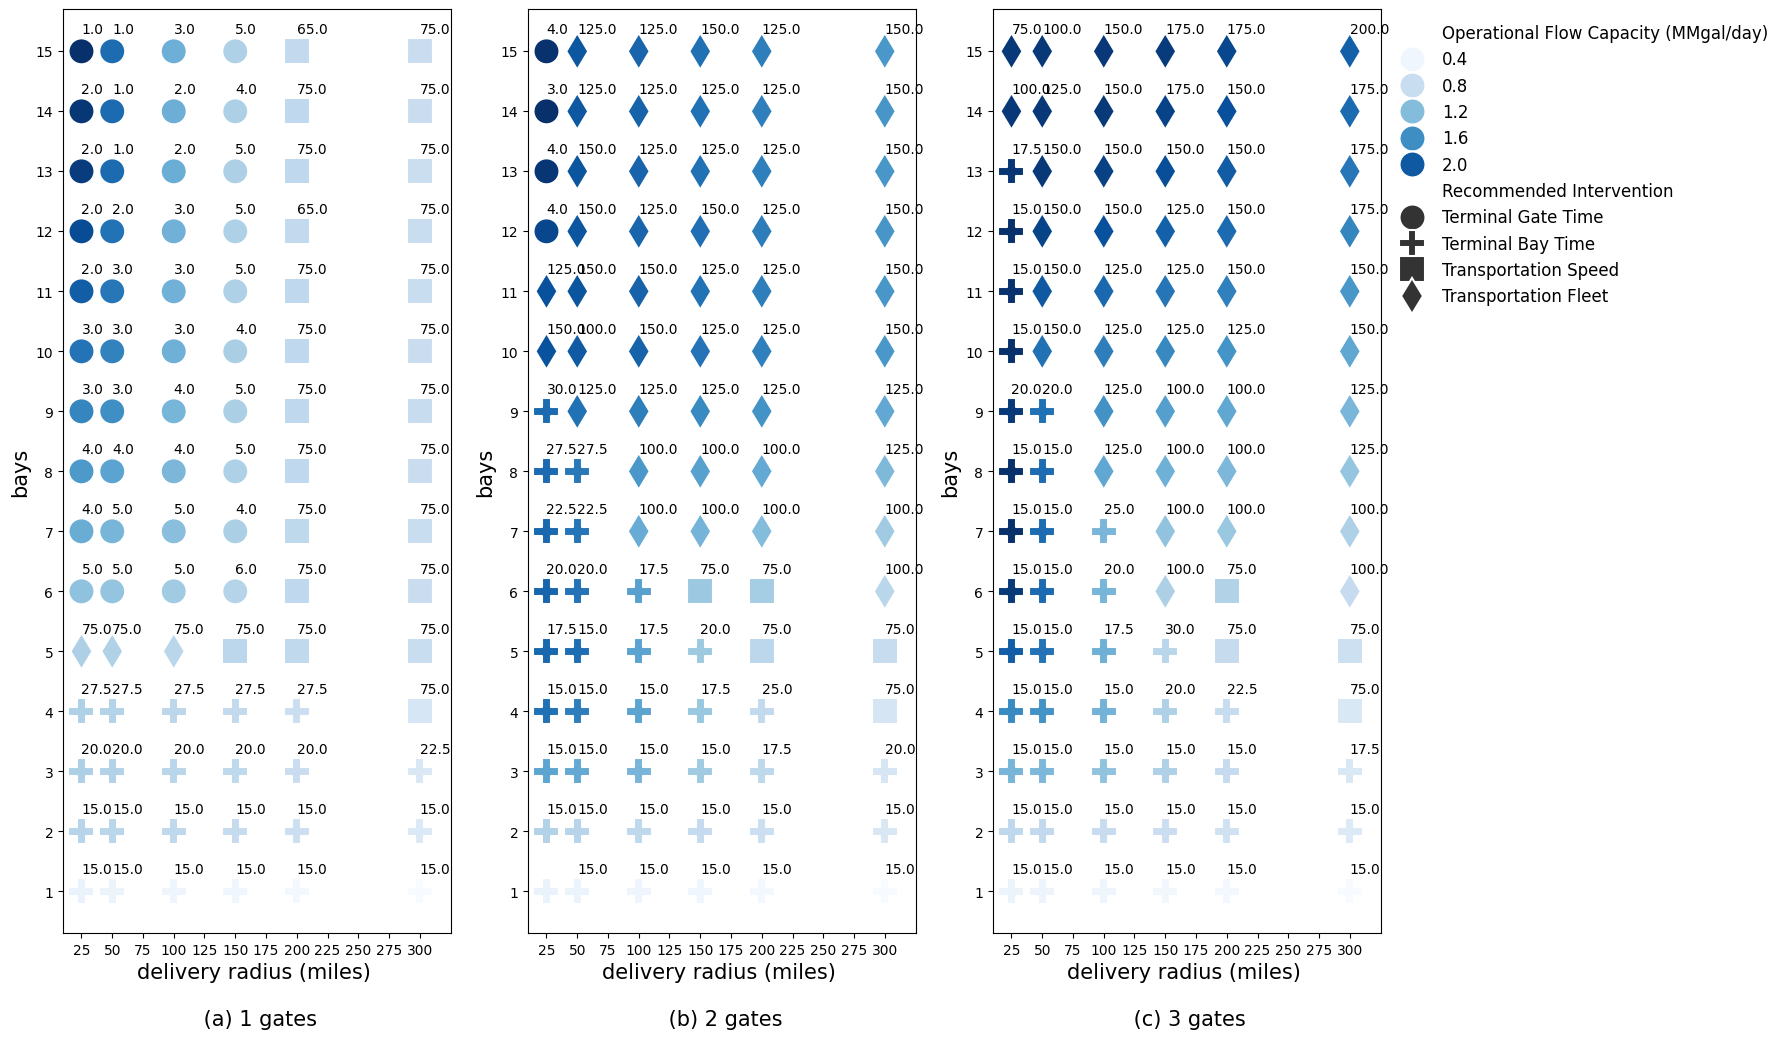

In [10]:
fig, axs = plt.subplots(1, 3, figsize = (17, 12))
markers = {'Terminal Gate Time': 'o', 'Terminal Bay Time': 'P', 'Transportation Speed': 's', 'Transportation Fleet': 'd'}
sns.scatterplot(ax = axs[0], x = df1['Station_Dist'], y = df1['Bays'], \
                hue = df1['Operational Flow Capacity (MMgal/day)'], palette = 'Blues',\
                style = df['Recommended Intervention'], markers = markers, s = 350, legend = False)
axs[0].set_xlabel('delivery radius (miles) \n \n (a) 1 gates', fontsize = 15)
axs[0].set_xticks(np.arange(25,325,25))
axs[0].set_xlim(10,325)
axs[0].set_ylabel('bays', fontsize = 15)
axs[0].set_yticks(np.arange(1,16,1))
for i in range(len(df1)):
     axs[0].text(x = df1['Station_Dist'].values[i], y = df1['Bays'].values[i]+0.3,\
                 s = df1['Best_Value'].values[i])

sns.scatterplot(ax = axs[1], x = df2['Station_Dist'], y = df2['Bays'], palette = 'Blues',\
                hue = df2['Operational Flow Capacity (MMgal/day)'],\
                style = df['Recommended Intervention'], markers = markers, s = 350, legend = False)
axs[1].set_xlabel('delivery radius (miles) \n \n (b) 2 gates', fontsize = 15)
axs[1].set_xticks(np.arange(25,325,25))
axs[1].set_xlim(10,325)
axs[1].set_ylabel('bays', fontsize = 15)
axs[1].set_yticks(np.arange(1,16,1))
for i in range(1,len(df2)):
     axs[1].text(x = df2['Station_Dist'].values[i], y = df2['Bays'].values[i]+0.3,\
                 s = df2['Best_Value'].values[i])

sns.scatterplot(ax = axs[2], x = df3['Station_Dist'], y = df3['Bays'], palette = 'Blues',\
                hue = df3['Operational Flow Capacity (MMgal/day)'],\
                style = df['Recommended Intervention'], markers = markers, s = 350)
axs[2].set_xlabel('delivery radius (miles) \n \n (c) 3 gates', fontsize = 15)
axs[2].set_xticks(np.arange(25,325,25))
axs[2].set_xlim(10,325)
axs[2].set_ylabel('bays', fontsize = 15)
axs[2].set_yticks(np.arange(1,16,1))
for i in range(1,len(df3)):
     axs[2].text(x = df3['Station_Dist'].values[i], y = df3['Bays'].values[i]+0.3,\
                 s = df3['Best_Value'].values[i])
axs[2].legend(loc = 'upper left', bbox_to_anchor = (1, 1), ncol = 1, fontsize = 12, frameon = False)

fig.savefig('terminal_decision_30iter.pdf', bbox_inches = 'tight')

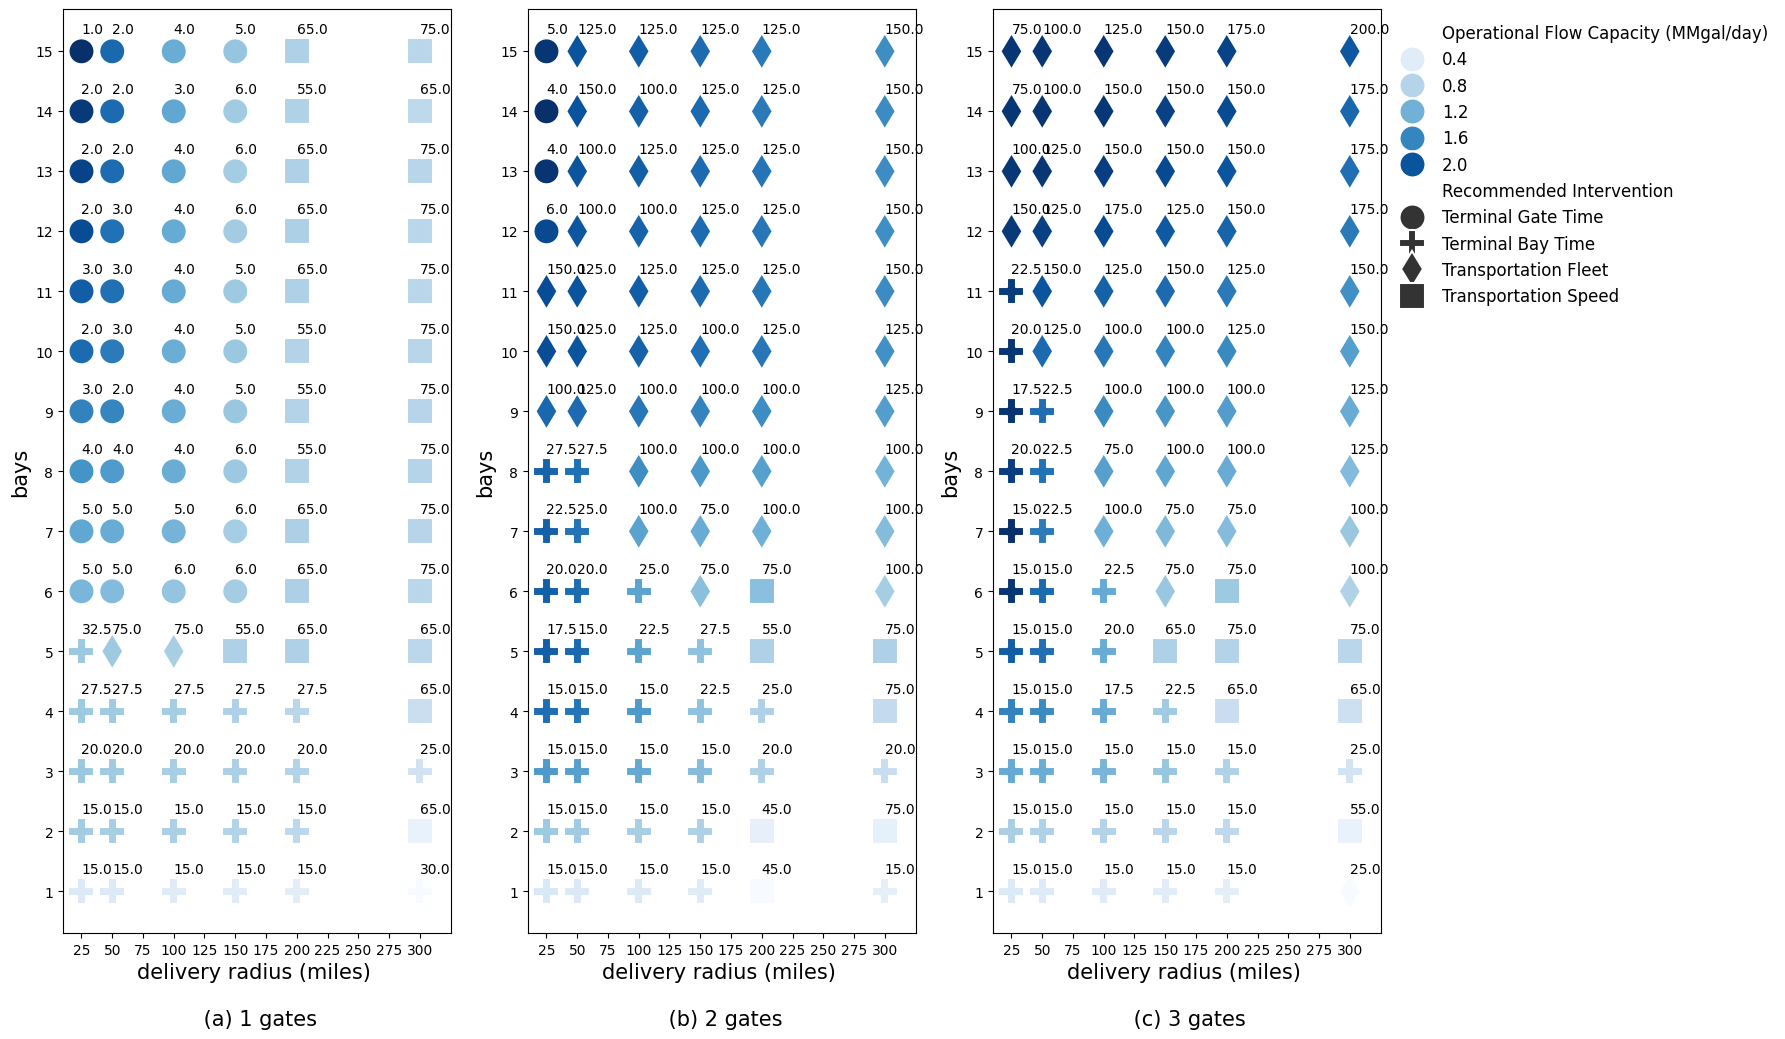

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(17, 12))
markers = {'Terminal Gate Time': 'o', 'Terminal Bay Time': 'P', 'Transportation Speed': 's', 'Transportation Fleet': 'd'}

# First subplot without legend
sns.scatterplot(ax=axs[0], x=df1['Station_Dist'], y=df1['Bays'],
                hue=df1['Operational Flow Capacity (MMgal/day)'], palette='Blues',
                style=df1['Recommended Intervention'], markers=markers, s=350, legend=False)
axs[0].set_xlabel('delivery radius (miles) \n \n (a) 1 gates', fontsize=15)
axs[0].set_xticks(np.arange(25, 325, 25))
axs[0].set_xlim(10, 325)
axs[0].set_ylabel('bays', fontsize=15)
axs[0].set_yticks(np.arange(1, 16, 1))
for i in range(len(df1)):
    axs[0].text(x=df1['Station_Dist'].values[i], y=df1['Bays'].values[i] + 0.3,
                s=df1['Best_Value'].values[i])

# Second subplot without legend
sns.scatterplot(ax=axs[1], x=df2['Station_Dist'], y=df2['Bays'], palette='Blues',
                hue=df2['Operational Flow Capacity (MMgal/day)'],
                style=df2['Recommended Intervention'], markers=markers, s=350, legend=False)
axs[1].set_xlabel('delivery radius (miles) \n \n (b) 2 gates', fontsize=15)
axs[1].set_xticks(np.arange(25, 325, 25))
axs[1].set_xlim(10, 325)
axs[1].set_ylabel('bays', fontsize=15)
axs[1].set_yticks(np.arange(1, 16, 1))
for i in range(len(df2)):
    axs[1].text(x=df2['Station_Dist'].values[i], y=df2['Bays'].values[i] + 0.3,
                s=df2['Best_Value'].values[i])

# Third subplot with legend
scatter = sns.scatterplot(ax=axs[2], x=df3['Station_Dist'], y=df3['Bays'], palette='Blues',
                          hue=df3['Operational Flow Capacity (MMgal/day)'],
                          style=df3['Recommended Intervention'], markers=markers, s=350)
axs[2].set_xlabel('delivery radius (miles) \n \n (c) 3 gates', fontsize=15)
axs[2].set_xticks(np.arange(25, 325, 25))
axs[2].set_xlim(10, 325)
axs[2].set_ylabel('bays', fontsize=15)
axs[2].set_yticks(np.arange(1, 16, 1))
for i in range(len(df3)):
    axs[2].text(x=df3['Station_Dist'].values[i], y=df3['Bays'].values[i] + 0.3,
                s=df3['Best_Value'].values[i])

# Add a single legend with custom location
handles, labels = scatter.get_legend_handles_labels()
axs[2].legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize=12, frameon=False)

fig.savefig('terminal_decision.pdf', bbox_inches='tight')
